# Colab Notebook

In [5]:
import string
alphabets = string.ascii_uppercase
alphabets

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [6]:
## encoding: char_to_int
## decoding: int_to_char # done after getting the result to get the character associated with the number

In [11]:
int_to_char = {x:y for x,y in enumerate(alphabets)} # decoder
int_to_char

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y',
 25: 'Z'}

In [12]:
char_to_int = {y:x for x,y in enumerate(alphabets)} # encoder
char_to_int

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [54]:
## sequences of input, output and modifying input data to a higher dimension than output, and then encoding both

seq_length = 1
x = []
y = []
for i in range(len(alphabets)-seq_length):
  seq_in = [alphabets[i]] # input data should be multi dimensional
  seq_out = alphabets[i+seq_length] # showed have lower dimensions than input data
  print(seq_in, '-->',seq_out)
  x += [[char_to_int[seq_in[0]]]] # encoding for seq_in
  y += [char_to_int[seq_out]] # encoding for seq_out


['A'] --> B
['B'] --> C
['C'] --> D
['D'] --> E
['E'] --> F
['F'] --> G
['G'] --> H
['H'] --> I
['I'] --> J
['J'] --> K
['K'] --> L
['L'] --> M
['M'] --> N
['N'] --> O
['O'] --> P
['P'] --> Q
['Q'] --> R
['R'] --> S
['S'] --> T
['T'] --> U
['U'] --> V
['V'] --> W
['W'] --> X
['X'] --> Y
['Y'] --> Z


In [21]:
x # multi dimensional (X_train)

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24]]

In [22]:
y # target output(y_train)

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25]

Prepare the Input data

In [23]:
import numpy as np


In [24]:
x = np.reshape(x, (x.shape[0],1,1))
x

array([[[ 0]],

       [[ 1]],

       [[ 2]],

       [[ 3]],

       [[ 4]],

       [[ 5]],

       [[ 6]],

       [[ 7]],

       [[ 8]],

       [[ 9]],

       [[10]],

       [[11]],

       [[12]],

       [[13]],

       [[14]],

       [[15]],

       [[16]],

       [[17]],

       [[18]],

       [[19]],

       [[20]],

       [[21]],

       [[22]],

       [[23]],

       [[24]]])

In [25]:
# normalizing x
x = x / 25 # simple division with 25 since 25 is present in output but not in the input sequence and min(x) = 0. Otherwise use min max scaler.
x

array([[[0.  ]],

       [[0.04]],

       [[0.08]],

       [[0.12]],

       [[0.16]],

       [[0.2 ]],

       [[0.24]],

       [[0.28]],

       [[0.32]],

       [[0.36]],

       [[0.4 ]],

       [[0.44]],

       [[0.48]],

       [[0.52]],

       [[0.56]],

       [[0.6 ]],

       [[0.64]],

       [[0.68]],

       [[0.72]],

       [[0.76]],

       [[0.8 ]],

       [[0.84]],

       [[0.88]],

       [[0.92]],

       [[0.96]]])

In [27]:
## Preparing output data. One hot encoding y
from keras.utils import to_categorical
y_new = to_categorical(y)
y_new.shape

(25, 26)

In [28]:
y_new # y_train

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 

## Build the model

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.utils import plot_model

In [35]:
# instantiating the model
model = Sequential()

In [36]:
# adding layers to the model
model.add(tf.keras.layers.Input(shape=(1,1))) # Input layer
model.add(Dense(25, activation='relu'))
model.add(SimpleRNN(32))
model.add(Dense(26, activation='softmax'))

In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1, 25)               │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 32)                  │           1,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │             858 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,764 (10.80 KB)

 Trainable params: 2,764 (10.80 KB)

 Non-trainable params: 0 (0.00 B)

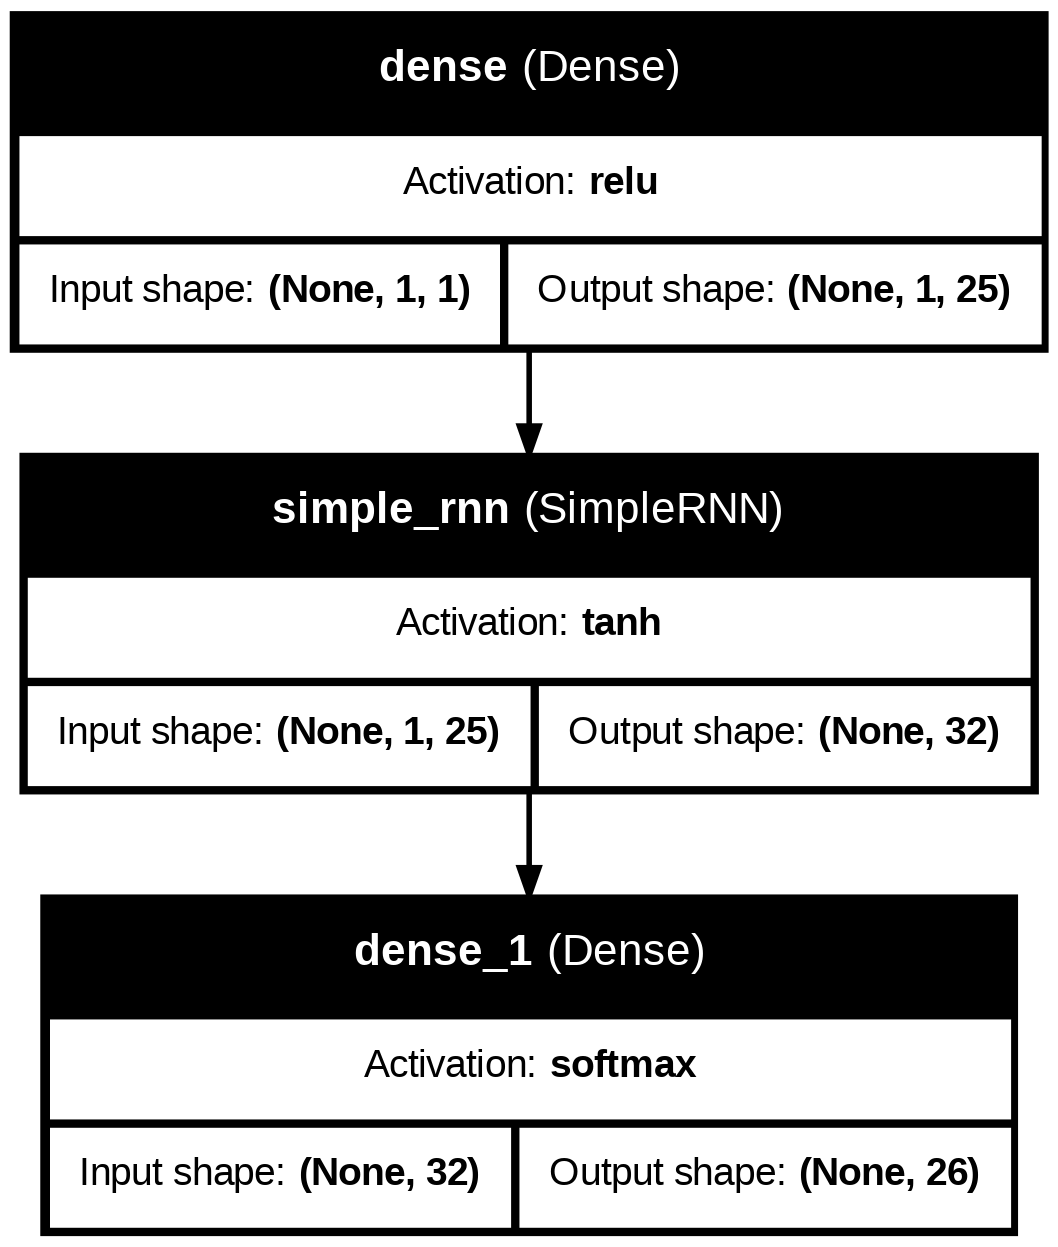

In [40]:
plot_model(model, show_layer_activations=True, show_layer_names=True, show_shapes=True)

Model compile

In [44]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
model.fit(x, y_new, epochs=500, batch_size=1) # re run once more. Previous weights are carried forward. so 2 time 500 epochs is basically running it for 1000 epochs

Epoch 1/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8792 - loss: 1.2215 
Epoch 2/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9331 - loss: 1.2917 
Epoch 3/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8427 - loss: 1.2306 
Epoch 4/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9129 - loss: 1.3161 
Epoch 5/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9061 - loss: 1.2635 
Epoch 6/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9351 - loss: 1.2906 
Epoch 7/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8077 - loss: 1.2951     
Epoch 8/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9298 - loss: 1.3441 
Epoch 9/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7889 - loss: 1.2592     
Epoch 10/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9318 - loss: 1.2991 
Epoch 11/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8240 - loss: 1.3207 
Epoch 12/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3

In [48]:
model.evaluate(x,y_new, batch_size=1)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9953 - loss: 0.4925 


[0.6706839203834534, 0.9599999785423279]

## Model Evaluation

In [63]:
# generating the predicted string from a test string
new = 'PQRSTABCDZ'
output_str = ''
for char in new:
  new_y= char_to_int[char] # encoding
  new_y  = np.reshape(new_y, (1,1,1)) # reshaping
  new_y = new_y / 25 # normalizing
  y_pred = np.argmax(model.predict(new_y)) # picking out the index of the maximum probability node from output
  y_pred = int_to_char[y_pred]
  output_str += y_pred
output_str


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


'QRSTUBCDEZ'

# Increasing the sequence width

In [69]:
seq_length = 3
seq_len_new = 0
x = []
y = []
for i in range(len(alphabets)):
  if len(x)<len(alphabets)-seq_length:
    seq_in = [alphabets[i]] # input data should be multi dimensional
    seq_out = alphabets[i+seq_length] # showed have lower dimensions than input data
    print(seq_in, '-->',seq_out)
    x += [[char_to_int[seq_in[0]]]] # encoding for seq_in
    y += [char_to_int[seq_out]] # encoding for seq_out
  else:
    seq_in = [alphabets[i]] # input data should be multi dimensional
    seq_out = alphabets[seq_len_new] # showed have lower dimensions than input data
    print(seq_in, '-->',seq_out)
    x += [[char_to_int[seq_in[0]]]] # encoding for seq_in
    y += [char_to_int[seq_out]] # encoding for seq_out
    seq_len_new += 1

['A'] --> D
['B'] --> E
['C'] --> F
['D'] --> G
['E'] --> H
['F'] --> I
['G'] --> J
['H'] --> K
['I'] --> L
['J'] --> M
['K'] --> N
['L'] --> O
['M'] --> P
['N'] --> Q
['O'] --> R
['P'] --> S
['Q'] --> T
['R'] --> U
['S'] --> V
['T'] --> W
['U'] --> X
['V'] --> Y
['W'] --> Z
['X'] --> A
['Y'] --> B
['Z'] --> C


# Increase sequence length

In [105]:
seq_length = 3
seq_len_new = 0
x = []
y = []
for i in range(len(alphabets)-seq_length):
    seq_in = alphabets[i:i + seq_length]# input data should be multi dimensional
    seq_out = alphabets[i+seq_length] # showed have lower dimensions than input data
    x.append([char_to_int[char] for char in seq_in]) # encoding for seq_in
    y.append([char_to_int[seq_out]]) # encoding for seq_out
    print(seq_in, '-->',seq_out)


ABC --> D
BCD --> E
CDE --> F
DEF --> G
EFG --> H
FGH --> I
GHI --> J
HIJ --> K
IJK --> L
JKL --> M
KLM --> N
LMN --> O
MNO --> P
NOP --> Q
OPQ --> R
PQR --> S
QRS --> T
RST --> U
STU --> V
TUV --> W
UVW --> X
VWX --> Y
WXY --> Z


In [106]:
x

[[0, 1, 2],
 [1, 2, 3],
 [2, 3, 4],
 [3, 4, 5],
 [4, 5, 6],
 [5, 6, 7],
 [6, 7, 8],
 [7, 8, 9],
 [8, 9, 10],
 [9, 10, 11],
 [10, 11, 12],
 [11, 12, 13],
 [12, 13, 14],
 [13, 14, 15],
 [14, 15, 16],
 [15, 16, 17],
 [16, 17, 18],
 [17, 18, 19],
 [18, 19, 20],
 [19, 20, 21],
 [20, 21, 22],
 [21, 22, 23],
 [22, 23, 24]]

In [107]:
y

[[3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25]]

In [109]:
x_new = np.reshape(x, (23,seq_length,1))
x_new.shape

(23, 3, 1)

In [110]:
len(y)

23

In [111]:
y_new = to_categorical(y)
y_new.shape

(23, 26)

In [112]:
x_new = x_new/25
x_new

array([[[0.  ],
        [0.04],
        [0.08]],

       [[0.04],
        [0.08],
        [0.12]],

       [[0.08],
        [0.12],
        [0.16]],

       [[0.12],
        [0.16],
        [0.2 ]],

       [[0.16],
        [0.2 ],
        [0.24]],

       [[0.2 ],
        [0.24],
        [0.28]],

       [[0.24],
        [0.28],
        [0.32]],

       [[0.28],
        [0.32],
        [0.36]],

       [[0.32],
        [0.36],
        [0.4 ]],

       [[0.36],
        [0.4 ],
        [0.44]],

       [[0.4 ],
        [0.44],
        [0.48]],

       [[0.44],
        [0.48],
        [0.52]],

       [[0.48],
        [0.52],
        [0.56]],

       [[0.52],
        [0.56],
        [0.6 ]],

       [[0.56],
        [0.6 ],
        [0.64]],

       [[0.6 ],
        [0.64],
        [0.68]],

       [[0.64],
        [0.68],
        [0.72]],

       [[0.68],
        [0.72],
        [0.76]],

       [[0.72],
        [0.76],
        [0.8 ]],

       [[0.76],
        [0.8 ],
        [0.84]],



In [113]:
model = Sequential()
model.add(tf.keras.layers.Input(shape=(3,1))) # Input layer
model.add(Dense(25, activation='relu'))
model.add(SimpleRNN(32))
model.add(Dense(26, activation='softmax'))

In [114]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 3, 25)               │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 32)                  │           1,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 26)                  │             858 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,764 (10.80 KB)

 Trainable params: 2,764 (10.80 KB)

 Non-trainable params: 0 (0.00 B)

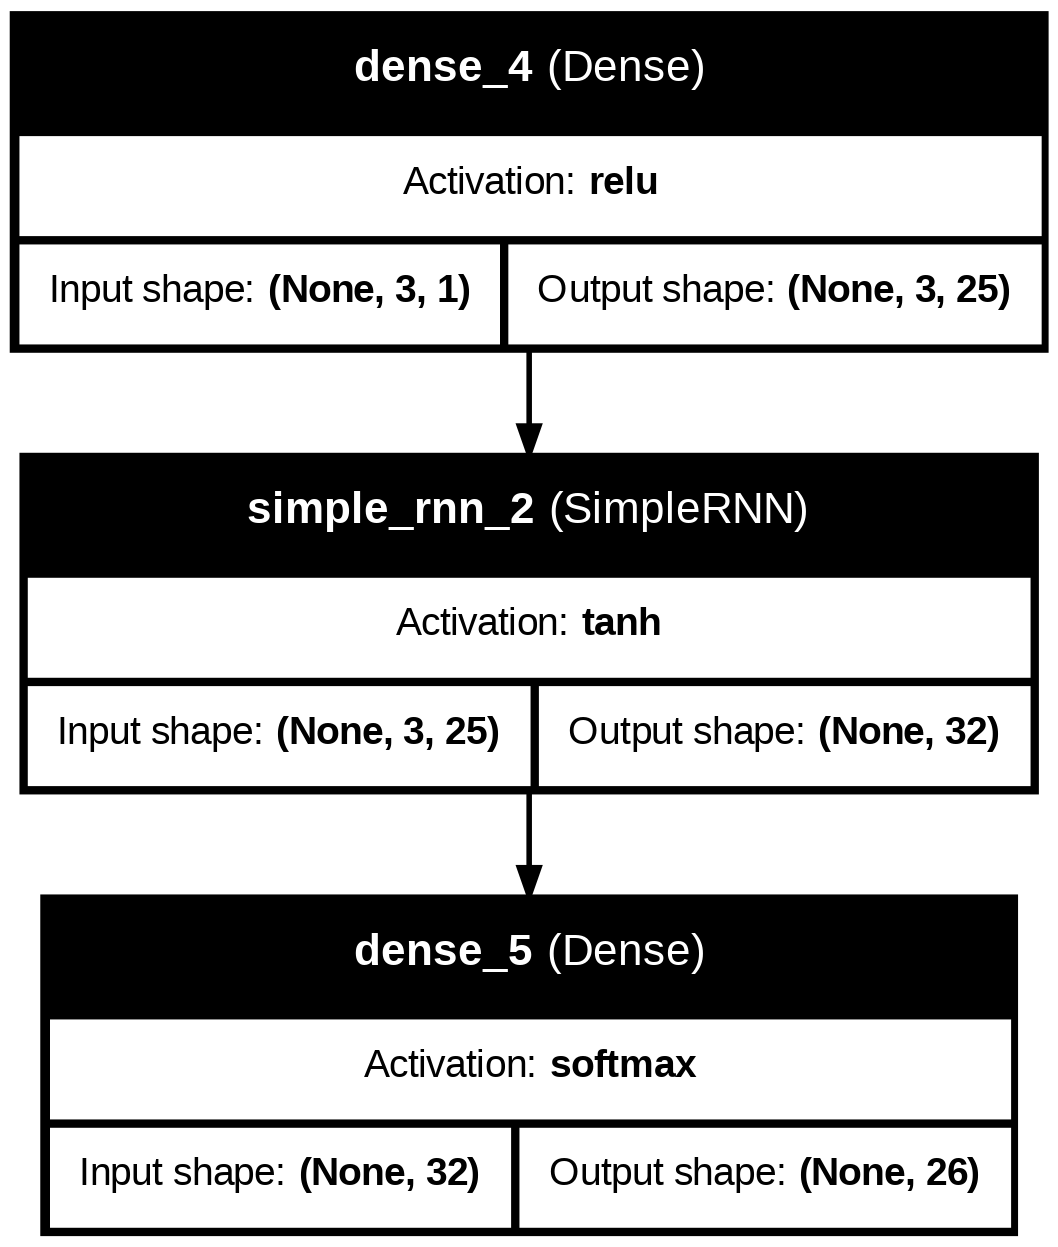

In [115]:
plot_model(model, show_layer_activations=True, show_layer_names=True, show_shapes=True)

In [116]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [117]:
model.fit(x_new, y_new, epochs=1000, batch_size=1) # re run once more. Previous weights are carried forward. so 2 time 500 epochs is basically running it for 1000 epochs

Epoch 1/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0000e+00 - loss: 3.2805
Epoch 2/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 3.2664 
Epoch 3/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1599 - loss: 3.2417     
Epoch 4/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0281 - loss: 3.2140
Epoch 5/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0354 - loss: 3.2165     
Epoch 6/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0553 - loss: 3.1690
Epoch 7/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0494 - loss: 3.1055     
Epoch 8/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0354 - loss: 3.1066     
Epoch 9/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0987 - loss: 3.0257
Epoch 10/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0247 - loss: 3.0855     
Epoch 11/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1855 - loss: 2.8735 
Epoch 12/1000
23/

In [119]:
model.evaluate(x_new, y_new, batch_size=1)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.1320  


[0.16673150658607483, 1.0]

# Evaluating the new model

In [118]:
new2 = 'PQR'
val = np.array([[char_to_int[x]] for x in new2])
val = val.reshape(1,3,1)
val = val/25
y_pred = model.predict(val, verbose=False)
y_pred = np.argmax(y_pred)
pred_char = int_to_char[y_pred]
print("\nInput Character:", new2, '-->', "Predicted Character:", pred_char)


Input Character: PQR --> Predicted Character: S
